In [52]:
import pandas as pd

In [59]:
pd.options.display.max_columns = None

In [60]:
train = pd.read_csv('train-dec-feb.csv', encoding='utf8', sep=',', decimal='.')

In [61]:
train.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,Left,Planned,Credit_taken,Pay_date
0,196,6,7,1000.0,100.0,100.0,0.0,100.0,2019-12-18 23:55:33,2020-02-18
1,227,20,7,500.0,50.0,50.0,0.0,50.0,2019-12-20 05:40:39,2020-02-20
2,238,22,7,500.0,50.0,50.0,0.0,50.0,2019-12-20 10:45:33,2020-02-20
3,45,24,26,5000.0,167.0,334.0,0.0,167.0,2019-12-20 14:59:29,2020-02-20
4,123,26,28,5000.0,167.0,0.0,167.0,167.0,2019-12-20 16:56:37,2020-02-20


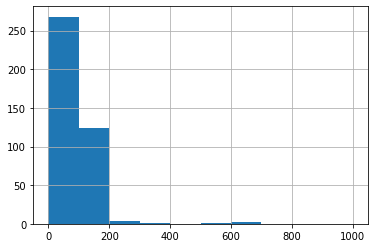

In [62]:
train.Payed.hist(bins=10, range = (0,1000));

In [92]:
left_train = sum(train.Left)
print(left_train)

6986.160000000001


In [93]:
Actually_payed_train = sum(train.Payed)
print(Actually_payed_train)

22600.87


In [94]:
Planned_train = sum(train.Planned)
print(Planned_train)

32194.0


In [95]:
Delta_train = Planned_train - left_train - Actually_payed_train
print(Delta_train)

2606.970000000001


In [66]:
test = pd.read_csv('trainmarch.csv', encoding='utf8', sep=',', decimal='.')

In [67]:
test.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,Left,Planned,Credit_taken,Pay_date
0,196,6,7,1000.0,100.0,0.0,100.0,100.0,2019-12-18 23:55:33,2020-03-18
1,227,20,7,500.0,50.0,0.0,50.0,50.0,2019-12-20 05:40:39,2020-03-20
2,238,22,7,500.0,50.0,0.0,50.0,50.0,2019-12-20 10:45:33,2020-03-20
3,45,24,26,5000.0,167.0,0.0,0.0,167.0,2019-12-20 14:59:29,2020-03-20
4,123,26,28,5000.0,167.0,0.0,167.0,167.0,2019-12-20 16:56:37,2020-03-20


In [97]:
Planned_in_march = sum(test.Planned)
print(Planned_in_march)

34513.0


In [98]:
Actually_payed_march = sum(test.Payed)
print(Actually_payed_march)

12828.919999999998


In [99]:
left_march = sum(test.Left)
print(left_march)

23078.5


In [100]:
Delta_test = Planned_in_march - left_march - Actually_payed_march
print(Delta_test)

-1394.4199999999983


In [101]:
train.columns

Index(['User_id', 'Credit_id', 'Count_months', 'Amount', 'Month_payment',
       'Payed', 'Left', 'Planned', 'Credit_taken', 'Pay_date'],
      dtype='object')

In [37]:
# предскажем катбустом

No handles with labels found to put in legend.


0:	learn: 67.7223620	total: 246us	remaining: 49ms
1:	learn: 66.4195794	total: 1.69ms	remaining: 167ms
2:	learn: 65.0300080	total: 2.51ms	remaining: 165ms
3:	learn: 63.4714308	total: 2.83ms	remaining: 139ms
4:	learn: 63.1725755	total: 3.33ms	remaining: 130ms
5:	learn: 61.8086573	total: 3.58ms	remaining: 116ms
6:	learn: 61.5315325	total: 4.05ms	remaining: 112ms
7:	learn: 60.0811225	total: 4.43ms	remaining: 106ms
8:	learn: 59.0465170	total: 4.79ms	remaining: 102ms
9:	learn: 58.7976614	total: 5.13ms	remaining: 97.5ms
10:	learn: 58.5601165	total: 5.29ms	remaining: 90.9ms
11:	learn: 57.6417134	total: 5.98ms	remaining: 93.6ms
12:	learn: 56.6263832	total: 6.34ms	remaining: 91.3ms
13:	learn: 56.4145430	total: 6.51ms	remaining: 86.4ms
14:	learn: 55.3286069	total: 7.34ms	remaining: 90.6ms
15:	learn: 54.3077849	total: 7.74ms	remaining: 89ms
16:	learn: 53.5699003	total: 8.25ms	remaining: 88.9ms
17:	learn: 52.6641110	total: 8.78ms	remaining: 88.8ms
18:	learn: 52.4869951	total: 9.23ms	remaining: 87.9

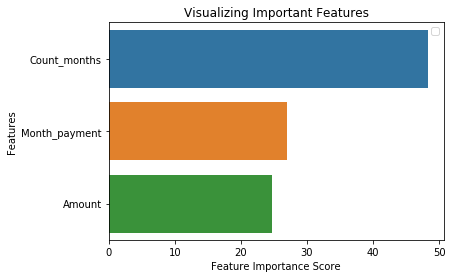

предположительно всего выплатят за март:  24535.21409328569


In [103]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
# initialize data
features = ['Count_months', 'Amount', 'Month_payment']

#lab_enc = preprocessing.LabelEncoder()
#df_target = df_investors.TotalPays.copy()
#encoded = lab_enc.fit_transform(df_target)

#X_train, X_val, y_train, y_val = train_test_split(df_investors[features], encoded, test_size=0.3)

X_train = train[features]
X_val = test[features]
y_train = train.Payed.copy()
y_val = test.Payed.copy()

model=CatBoostRegressor(iterations=200, depth=5, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train)
preds = model.predict(X_val)
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#plt.plot(y_val, label = 'actual')
# Plot the predicted values
#plt.plot(preds, label = 'prediction')
#plt.xticks(rotation = '60'); 
#plt.legend()
 
#print("предположительно всего выплатят за март: ", preds, '\n')
print("предположительно всего выплатят за март: ", sum(preds))


In [39]:
# пробуем предсказать случайным лесом

No handles with labels found to put in legend.


предположительно всего выплатят за март:  30229


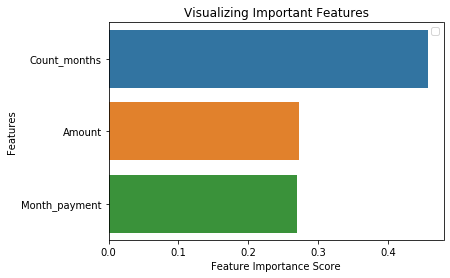

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
features = ['Count_months', 'Amount', 'Month_payment']

X_train = train[features]
X_val = test[features]
y_train = train.Payed.astype('int64').copy()
y_val = test.Payed.astype('int64').copy()

clf = ensemble.RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

#print("предположительно всего выплатят за март: ", y_pred, '\n')
print("предположительно всего выплатят за март: ", sum(y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [79]:
# предскажем логистической регрессией (НЕАДЕКВАТНЫЕ РЕЗУЛЬТАТЫ)

In [105]:
from sklearn.linear_model import LogisticRegression
features = ['Count_months', 'Amount', 'Month_payment']

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

clf = LogisticRegression(random_state=0, C=2.0, penalty='l2').fit(x, y)

print("предположительно всего выплатят за март: ", sum(clf.predict(x_val)))


предположительно всего выплатят за март:  51223


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
#Предскажем деревом решений

In [112]:
from sklearn.tree import DecisionTreeClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model = DecisionTreeClassifier()
model.fit(x,y)
proba = model.predict(x_val)

print("предположительно всего выплатят за март: ", sum(proba))

предположительно всего выплатят за март:  27023


In [109]:
# предскажем методом ближайших соседей

In [113]:
from sklearn.neighbors import KNeighborsClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model_knc = KNeighborsClassifier(n_neighbors = 18)
model_knc.fit(x,y)

proba = model_knc.predict(x_val)
print("предположительно всего выплатят за март: ", sum(proba))

предположительно всего выплатят за март:  26574


In [114]:
#метод опорных векторов

In [120]:
from sklearn import svm

model_svc = svm.SVC()
y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model_svc.probability = True
probas = model_svc.fit(x, y).predict_proba(x_val)

print("предположительно всего выплатят за март: ", sum(proba))

предположительно всего выплатят за март:  26574
